In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [339]:
df=pd.read_csv('airline_delay_causes.csv')

Some exploratory data analysis:

In [340]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2003,6,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",307.0,56.0,14.68,10.79,...,9.96,1.0,1.0,2530.0,510.0,621.0,676.0,25.0,698.0,NaN
1,2003,6,AA,American Airlines Inc.,ANC,"Anchorage, AK: Ted Stevens Anchorage Internati...",90.0,27.0,7.09,2.00,...,7.16,0.0,0.0,1390.0,271.0,83.0,581.0,0.0,455.0,NaN
2,2003,6,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",752.0,186.0,33.99,27.82,...,17.53,5.0,0.0,8314.0,1367.0,1722.0,3817.0,139.0,1269.0,NaN
3,2003,6,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",842.0,174.0,60.24,20.54,...,40.75,9.0,1.0,8344.0,3040.0,1032.0,1835.0,115.0,2322.0,NaN
4,2003,6,AA,American Airlines Inc.,BDL,"Hartford, CT: Bradley International",383.0,55.0,14.90,8.91,...,16.61,0.0,0.0,3137.0,815.0,574.0,555.0,0.0,1193.0,NaN


In [341]:
df.columns

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed: 21'],
      dtype='object')

In [342]:
dfGY=df.groupby('year').mean()


In [343]:
#dfGYW=dfGY['weather_ct']
dfGYA=dfGY[' arr_delay']


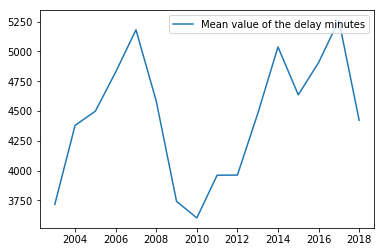

In [344]:
plt.plot(dfGYA,label='Mean value of the delay minutes')
plt.legend()

In [345]:
dfGYC=dfGY[' carrier_delay']
dfGYW=dfGY['weather_delay']
dfGYN=dfGY['nas_delay']
dfGYS=dfGY['security_delay']

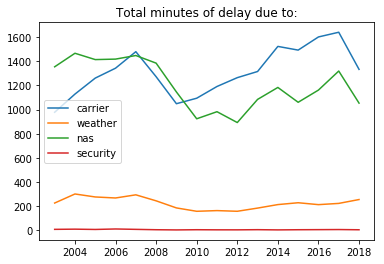

In [346]:
plt.plot(dfGYC,label='carrier')
plt.plot(dfGYW,label='weather')
plt.plot(dfGYN,label='nas')
plt.plot(dfGYS,label='security')
plt.title('Total minutes of delay due to:')
plt.legend()

In [347]:
dfGCN=df.groupby('carrier').mean()

In [190]:
dfGCNT=dfGCN[' arr_delay']

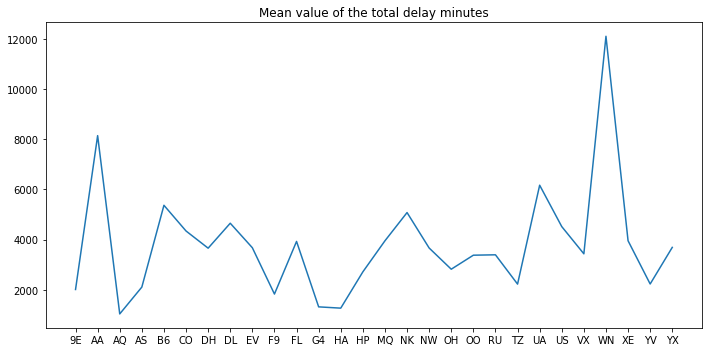

In [193]:
plt.figure(figsize=(10,5))
plt.plot(dfGCNT)
plt.title('Mean value of the total delay minutes')
plt.tight_layout()

In [136]:
dfGM=df.groupby(' month').mean()

In [137]:
dfGMA=dfGM[' arr_delay']

Text(0.5,0,'month')

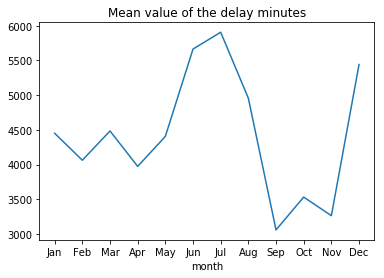

In [151]:
ind = np.arange(1,13) 
plt.plot(dfGMA)
plt.title('Mean value of the delay minutes')
plt.xticks(ind,('Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
plt.xlabel('month')


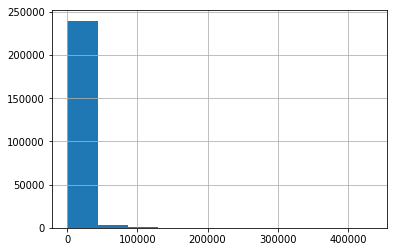

In [183]:
df[' arr_delay'].hist()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


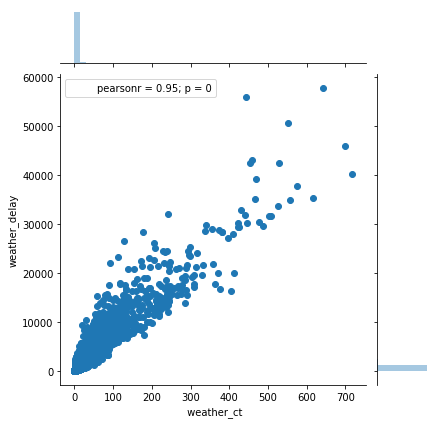

In [188]:
sns.jointplot(x=' weather_ct',y='weather_delay',data=df)
#plt.xlabel('Number of flights delayed due to weather')
#plt.ylabel('Total minutes of delay due to weather')

In [206]:
dfGANS=df.groupby('carrier').sum()
dfGAD=dfGANS['arr_del15']
dfGAF=dfGANS['arr_flights']
dfGP=(dfGANS['arr_del15']/dfGANS['arr_flights'])*100
dfGP

carrier
9E    17.677073
AA    20.895085
AQ     7.118050
AS    16.885673
B6    23.624904
CO    21.954066
DH    20.659631
DL    16.876383
EV    22.498820
F9    21.901751
FL    20.031082
G4    23.919080
HA     7.956057
HP    19.147312
MQ    21.855948
NK    22.595474
NW    22.042211
OH    22.295986
OO    17.897788
RU    21.730813
TZ    19.451899
UA    20.047451
US    19.218242
VX    20.453401
WN    18.871569
XE    21.832273
YV    19.580989
YX    17.895371
dtype: float64

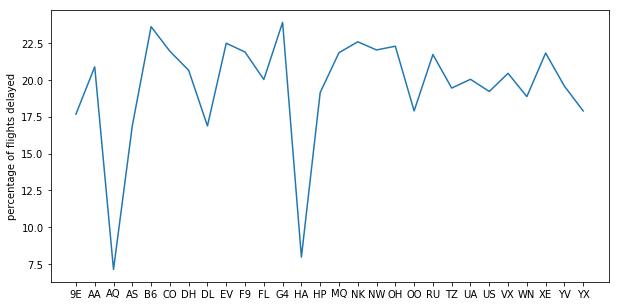

In [205]:
plt.figure(figsize=(10,5))
plt.ylabel('percentage of flights delayed')
plt.plot(dfGP)

Text(0,0.5,'Number of calcelled arrivals')

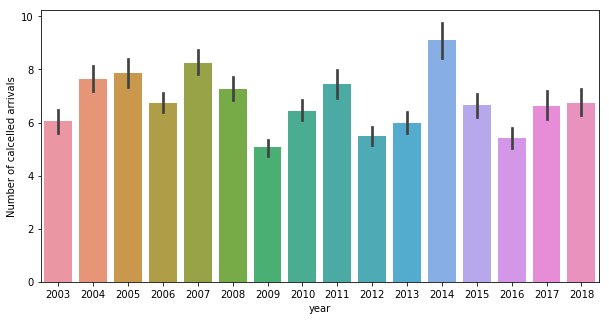

In [209]:
plt.figure(figsize=(10,5))

sns.barplot(x='year',y='arr_cancelled',data=df)
plt.ylabel('Number of calcelled arrivals')

In [334]:
dfGYS=df.groupby('year').sum()
dfGYW=dfGYS['weather_delay']
dfGYT=dfGYS[' arr_delay']
dfGYP=(dfGYW/dfGYT)*100


Text(0,0.5,'percentage')

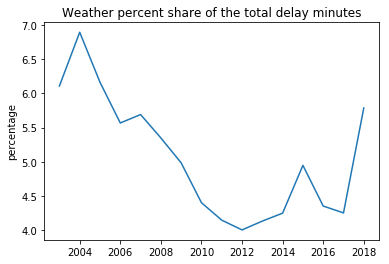

In [335]:
plt.plot(dfGYP)
plt.title('Weather percent share of the total delay minutes')
plt.ylabel('percentage')

In [355]:
dfGMS=df.groupby(' month').sum()
dfGMW=dfGMS['weather_delay']
dfGMT=dfGMS[' arr_delay']
dfGMP=(dfGMW/dfGMT)*100

Text(0,0.5,'percentage')

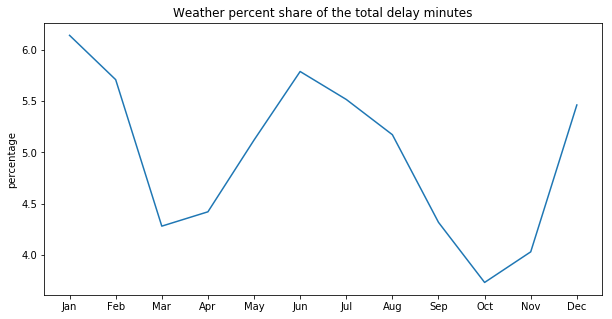

In [357]:
plt.figure(figsize=(10,5))
plt.plot(dfGMP)
plt.title('Weather percent share of the total delay minutes')
plt.xticks(ind,('Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
plt.ylabel('percentage')

In [348]:
df['carrier'].value_counts()

OO    27780
EV    24505
DL    21607
MQ    18822
AA    15117
UA    14682
WN    13269
US    10698
YV    10105
AS     9619
B6     8740
OH     8435
NW     8084
F9     7923
9E     7753
XE     7375
FL     6956
CO     6917
RU     4136
HA     2747
DH     1924
HP     1581
NK     1535
VX     1428
TZ      924
G4      819
YX      576
AQ      253
Name: carrier, dtype: int64

In [336]:
dfOO=df[df['carrier']=='OO'].groupby('year').mean()['carrier_ct']
dfEV=df[df['carrier']=='EV'].groupby('year').mean()['carrier_ct']
dfDL=df[df['carrier']=='DL'].groupby('year').mean()['carrier_ct']
dfMQ=df[df['carrier']=='MQ'].groupby('year').mean()['carrier_ct']
dfAA=df[df['carrier']=='AA'].groupby('year').mean()['carrier_ct']

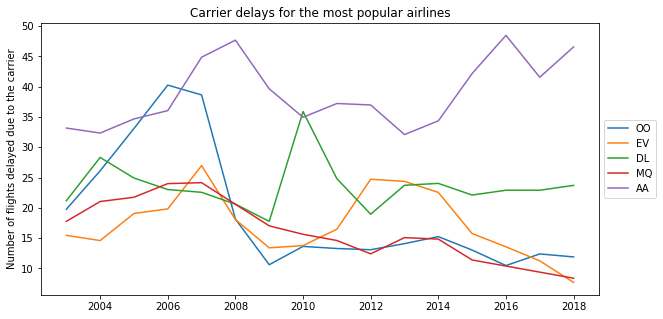

In [337]:
plt.figure(figsize=(10,5))
plt.plot(dfOO,label='OO')
plt.plot(dfEV,label='EV')
plt.plot(dfDL,label='DL')
plt.plot(dfMQ,label='MQ')
plt.plot(dfAA,label='AA')

plt.title('Carrier delays for the most popular airlines')
plt.ylabel('Number of flights delayed due to the carrier')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


More detailed analysis:

In [280]:
df1 = df[(df.airport == 'LAX')].copy()
df1.head(5)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
38,2003,6,AA,American Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",2462.0,533.0,155.25,43.58,...,106.82,9.0,1.0,27823.0,9761.0,2863.0,7404.0,124.0,7671.0,NaN
109,2003,6,AS,Alaska Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",704.0,62.0,34.10,0.00,...,23.13,14.0,0.0,2407.0,1536.0,0.0,107.0,0.0,764.0,NaN
190,2003,6,CO,Continental Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",560.0,99.0,30.05,2.91,...,14.71,0.0,1.0,4681.0,1791.0,115.0,1815.0,0.0,960.0,NaN
368,2003,6,DL,Delta Air Lines Inc.,LAX,"Los Angeles, CA: Los Angeles International",1077.0,288.0,89.16,8.31,...,41.74,1.0,0.0,9772.0,3230.0,374.0,4243.0,0.0,1925.0,NaN
586,2003,6,HP,America West Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",510.0,59.0,32.21,0.00,...,16.00,0.0,0.0,2020.0,1224.0,0.0,226.0,0.0,570.0,NaN


In [293]:
df_l = df1[['year', ' month', 'arr_flights', 'arr_del15']].dropna()
df_l = df_t.groupby(['year', ' month']).sum()
df_l.reset_index(inplace=True)

In [294]:
df_l.head()

,year,month,arr_flights,arr_del15
0,2003,6,18462.0,2571.0
1,2003,7,19295.0,2380.0
2,2003,8,19253.0,2333.0
3,2003,9,18196.0,1496.0
4,2003,10,18973.0,2463.0


In [321]:
X = df_l[['year', ' month', 'arr_flights']]
y = df_l['arr_del15']
X.columns

Index(['year', ' month', 'arr_flights'], dtype='object')

In [322]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [324]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [325]:
print(lm.intercept_)

-167260.9530826729


In [326]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
year,80.976392
month,3.282212
arr_flights,0.438540


In [327]:
predictions = lm.predict(X_test)

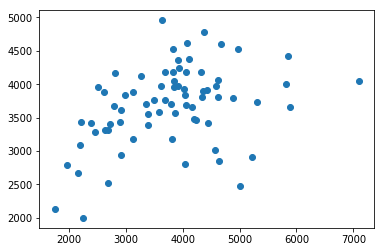

In [328]:
plt.scatter(y_test,predictions)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


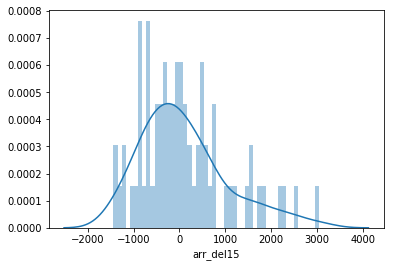

In [329]:
sns.distplot((y_test-predictions),bins=50);

In [330]:
from sklearn import metrics

In [349]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 723.2860122755985
Mean Squared Error: 918940.199314431
Root Mean Squared Error: 958.613686171041


These analyses show that a simple Linear Regession probably is not the best model to fit
the data because the scatter plot shows that different predictions are not in agreement
with the actual values.